# Recursive technical homework



# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

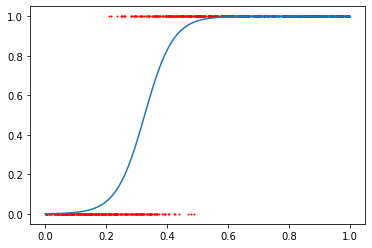

In the image above, the x and y axis correspond to the variables defined previously, with the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

Epoch 1/20, Loss: 13.5298, b1: -3.8790, b2: 12.8884
Epoch 2/20, Loss: 6.0211, b1: -4.6707, b2: 15.3724
Epoch 3/20, Loss: 5.6573, b1: -5.1361, b2: 16.8661
Epoch 4/20, Loss: 5.5070, b1: -5.4554, b2: 17.8958
Epoch 5/20, Loss: 5.4298, b1: -5.6902, b2: 18.6531
Epoch 6/20, Loss: 5.3854, b1: -5.8697, b2: 19.2318
Epoch 7/20, Loss: 5.3580, b1: -6.0104, b2: 19.6850
Epoch 8/20, Loss: 5.3402, b1: -6.1227, b2: 20.0462
Epoch 9/20, Loss: 5.3282, b1: -6.2133, b2: 20.3376
Epoch 10/20, Loss: 5.3200, b1: -6.2872, b2: 20.5751
Epoch 11/20, Loss: 5.3141, b1: -6.3479, b2: 20.7699
Epoch 12/20, Loss: 5.3098, b1: -6.3980, b2: 20.9308
Epoch 13/20, Loss: 5.3067, b1: -6.4396, b2: 21.0642
Epoch 14/20, Loss: 5.3044, b1: -6.4742, b2: 21.1752
Epoch 15/20, Loss: 5.3026, b1: -6.5031, b2: 21.2679
Epoch 16/20, Loss: 5.3012, b1: -6.5273, b2: 21.3455
Epoch 17/20, Loss: 5.3002, b1: -6.5476, b2: 21.4105
Epoch 18/20, Loss: 5.2993, b1: -6.5646, b2: 21.4651
Epoch 19/20, Loss: 5.2987, b1: -6.5789, b2: 21.5111
Epoch 20/20, Loss: 5

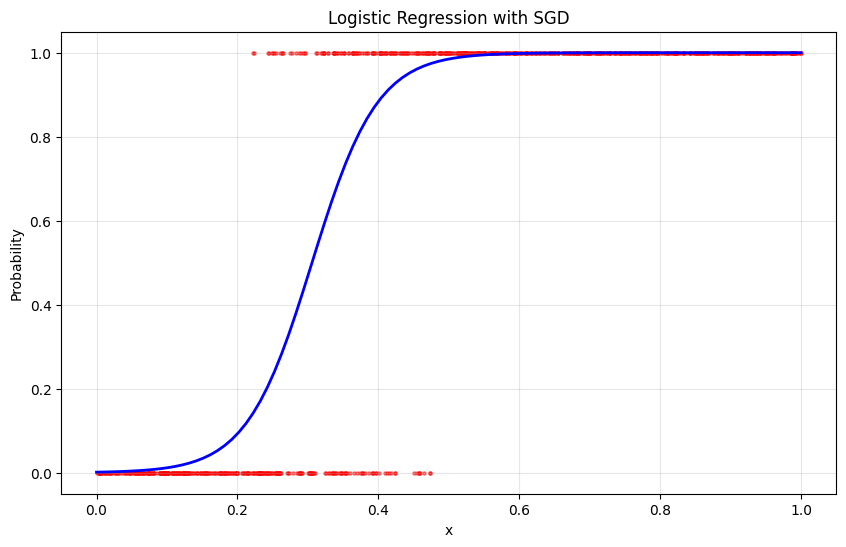

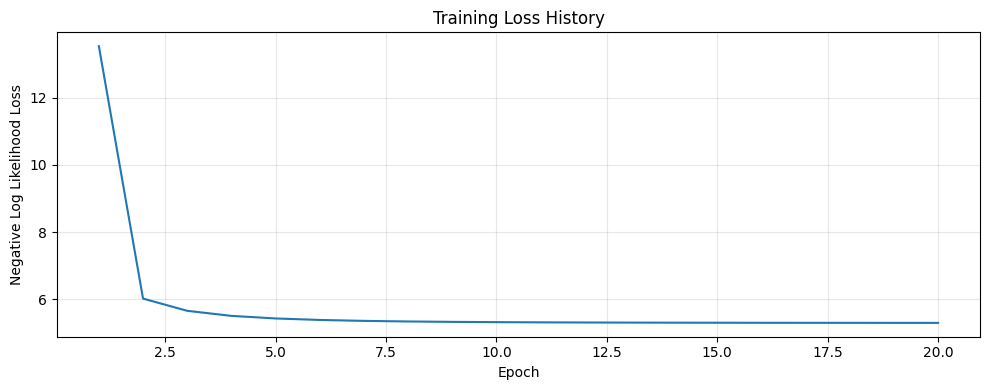

Final parameters: b1 = -6.5910, b2 = 21.5498


In [ ]:
input, label = generate_data()

inputs = torch.split(input, 32)
labels = torch.split(label, 32)

b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)

# Learning rate
alpha = 0.5

loss_history = []

for epoch in range(20):
    epoch_loss = 0
    for x, y in zip(inputs, labels):
        # Calculate p_x as per formula above
        z = b1 + b2 * x
        p_x = 1 / (1 + torch.exp(-z))

        # Calculate the negative log likelihood
        # Clip probabilities for avoiding numerical issues
        p_x = torch.clamp(p_x, 1e-10, 1.0 - 1e-10)
        loss = -torch.sum(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x))
        epoch_loss += loss.item()

        # Calculate the gradient of the loss w.r.t. the inputs
        loss.backward()

        # Update the parameters b according to SGD formula
        with torch.no_grad():
            b1 -= alpha * b1.grad
            b2 -= alpha * b2.grad

            # Zero gradients after the update
            b1.grad.zero_()
            b2.grad.zero_()

    # Store and print loss value
    avg_loss = epoch_loss / len(inputs)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/20, Loss: {avg_loss:.4f}, b1: {b1.item():.4f}, b2: {b2.item():.4f}")

# Produce the image to validate result
plt.figure(figsize=(10, 6))

# Plot the data points
x_sorted, indices = torch.sort(input)
y_sorted = label[indices]
plt.scatter(x_sorted.numpy(), y_sorted.numpy(), c='red', s=5, alpha=0.5)

# Plot the learned logistic function
x_plot = torch.linspace(0, 1, 100)
z_plot = b1 + b2 * x_plot
p_plot = 1 / (1 + torch.exp(-z_plot))
plt.plot(x_plot.detach().numpy(), p_plot.detach().numpy(), 'b-', linewidth=2)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression with SGD')
plt.grid(True, alpha=0.3)

# Add a second subplot for the loss history
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(loss_history) + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Negative Log Likelihood Loss')
plt.title('Training Loss History')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final parameters: b1 = {b1.item():.4f}, b2 = {b2.item():.4f}")

# Part 2-1

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. For this problem you will need to use a regression loss, not a classification loss.

Successful training should result in a data interpolation similar to the below:
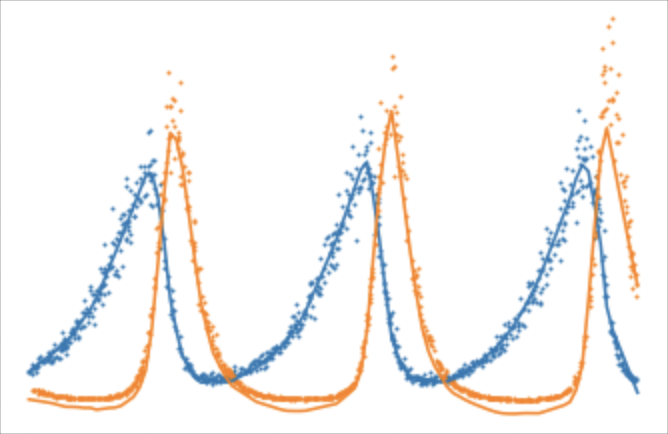

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
BATCH_SIZE = 64
LEARNING_RATE = 0.002
EPOCHS = 1500
HIDDEN_LAYERS = [128, 256, 256, 128]

In [ ]:
class SineLayer(nn.Module):
    """Custom sine activation layer for better modeling periodic data"""
    def __init__(self, in_features, out_features):
        super(SineLayer, self).__init__()
        self.omega = nn.Parameter(torch.ones(1) * 1.0)
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return torch.sin(self.omega * self.linear(x))

class Net(nn.Module):
    '''Model to regress 2d time series values given scalar input (time).'''
    def __init__(self):
        super(Net, self).__init__()
        # Input feature expansion
        self.input_expansion = nn.Linear(1, 32)

        # Main network
        self.fc1 = nn.Linear(32, HIDDEN_LAYERS[0])
        self.fc2 = nn.Linear(HIDDEN_LAYERS[0], HIDDEN_LAYERS[1])
        self.fc3 = nn.Linear(HIDDEN_LAYERS[1], HIDDEN_LAYERS[2])
        self.fc4 = nn.Linear(HIDDEN_LAYERS[2], HIDDEN_LAYERS[3])

        # Sine layer specifically for capturing oscillations
        self.sine_layer = SineLayer(HIDDEN_LAYERS[3], 64)

        # Output layer
        self.fc_out = nn.Linear(64, 2)

        # A separate branch for capturing the sharper peaks in y
        self.peak_branch = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            SineLayer(64, 32),
            nn.Linear(32, 2)
        )

        # Learnable weighting parameter for the two branches
        self.alpha = nn.Parameter(torch.tensor([0.5]))

    def forward(self, x):
        # Expand the input features to help model periodic patterns
        expanded = self.input_expansion(x)

        # Apply periodic encoding to capture oscillations better
        period = 2 * np.pi
        phase_shift = torch.cat([
            torch.sin(x * period / 5.0),
            torch.cos(x * period / 5.0),
            torch.sin(x * period / 2.5),
            torch.cos(x * period / 2.5)
        ], dim=1)

        # Main network branch
        h = F.relu(self.fc1(expanded))
        h = F.relu(self.fc2(h))
        h = F.relu(self.fc3(h))
        h = F.relu(self.fc4(h))
        h = self.sine_layer(h)
        main_output = self.fc_out(h)

        # Peak detection branch
        peak_output = self.peak_branch(expanded)

        # Combine outputs with learnable weighting
        alpha = torch.sigmoid(self.alpha)  # Keep alpha between 0 and 1
        output = alpha * main_output + (1 - alpha) * peak_output

        return output

In [ ]:
class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file):
        # Read CSV file
        df = pd.read_csv(csv_file)

        # Convert to numeric, replacing '-' with NaN
        self.df = df.replace('-', np.nan)
        self.df['t'] = pd.to_numeric(self.df['t'])
        self.df['x'] = pd.to_numeric(self.df['x'])
        self.df['y'] = pd.to_numeric(self.df['y'])

        # Create a mask of valid data points (where either x or y is available)
        self.valid_indices = self.df.index[
            self.df['x'].notna() | self.df['y'].notna()
        ].tolist()

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        # Map the index to the actual dataframe index
        df_idx = self.valid_indices[idx]
        row = self.df.iloc[df_idx]

        # Get time value as input
        t = float(row['t'])
        input_tensor = torch.tensor([t], dtype=torch.float32)

        # Get x and y values as target
        # If a value is missing, we'll mask it during loss calculation
        x_val = row['x'] if not np.isnan(row['x']) else 0.0
        y_val = row['y'] if not np.isnan(row['y']) else 0.0

        # Create a mask for missing values (0 if missing, 1 if present)
        x_mask = 0.0 if np.isnan(row['x']) else 1.0
        y_mask = 0.0 if np.isnan(row['y']) else 1.0

        target_tensor = torch.tensor([x_val, y_val], dtype=torch.float32)
        mask_tensor = torch.tensor([x_mask, y_mask], dtype=torch.float32)

        return input_tensor, target_tensor, mask_tensor

def masked_loss(outputs, labels, masks, lambda_reg=0.01):
    """Custom loss function with components for different features of the data"""
    # MSE for basic fitting
    squared_diff = (outputs - labels) ** 2
    masked_squared_diff = squared_diff * masks

    # Add special treatment for y values to capture the sharp peaks
    y_diff = (outputs[:, 1] - labels[:, 1]) ** 2
    y_mask = masks[:, 1]

    # More weight on the error where y is large (to capture peaks better)
    peak_emphasis = torch.where(
        labels[:, 1] > 2.0,  # Threshold for "peak" values
        5.0 * y_diff * y_mask,  # Higher weight for peak regions
        y_diff * y_mask
    )

    # Combine losses
    basic_loss = masked_squared_diff.sum()
    peak_loss = peak_emphasis.sum()

    # Count of valid data points
    valid_count = masks.sum()

    # Avoid division by zero
    if valid_count > 0:
        return (basic_loss + peak_loss) / valid_count
    else:
        return 0.0


In [ ]:
def train_model(csv_path):
    # Set random seed for reproducibility
    torch.manual_seed(42)
    np.random.seed(42)

    # Create dataset and dataloader
    dataset = TimeSeriesDataset(csv_path)
    trainloader = torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0
    )

    # Initialize the network
    net = Net()

    # Adam optimizer with weight decay for regularization
    optimizer = optim.AdamW(net.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

    # Learning rate scheduler - using ReduceLROnPlateau
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.5,  # Reduce LR by half on plateau
        patience=30
    )

    # For plotting loss over time
    losses = []

    # Early stopping parameters
    patience = 100
    patience_counter = 0
    best_loss = float('inf')
    best_state = None

    print(f"Starting training for {EPOCHS} epochs")

    for epoch in range(EPOCHS):
        net.train()
        running_loss = 0.0

        for i, data in enumerate(trainloader):
            inputs, labels, masks = data

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = masked_loss(outputs, labels, masks)

            # Backward pass and optimize
            loss.backward()

            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)

            optimizer.step()

            # Update statistics
            running_loss += loss.item()

        # Calculate epoch loss
        epoch_loss = running_loss / len(trainloader)
        losses.append(epoch_loss)

        # Step the scheduler based on epoch loss
        scheduler.step(epoch_loss)

        # Print every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.6f}')

        # Early stopping check
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience_counter = 0
            best_state = {key: value.cpu().clone() for key, value in net.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load best model state
    if best_state is not None:
        net.load_state_dict(best_state)

    print('Finished Training')
    return net, losses

Starting training for 1500 epochs
Epoch 100/1500, Loss: 6.581943
Epoch 200/1500, Loss: 4.205755
Epoch 300/1500, Loss: 0.935302
Epoch 400/1500, Loss: 0.578678
Epoch 500/1500, Loss: 0.495792
Early stopping at epoch 566
Finished Training


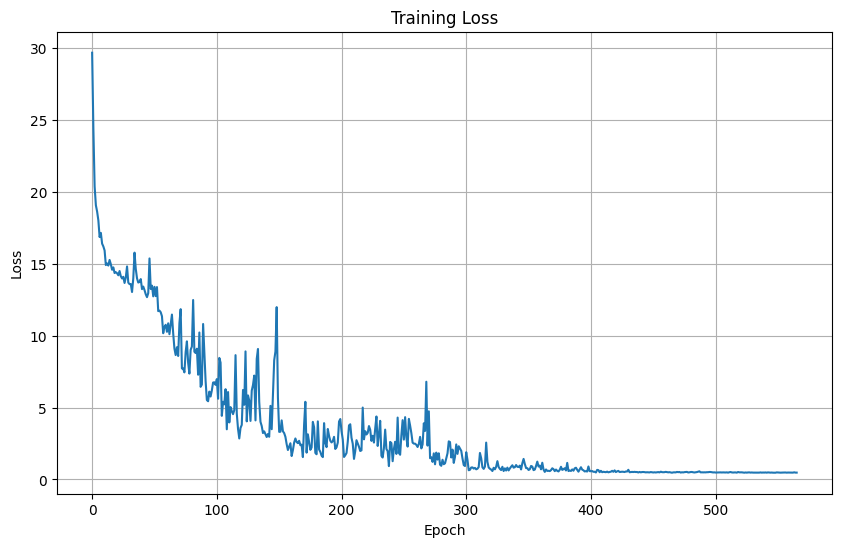

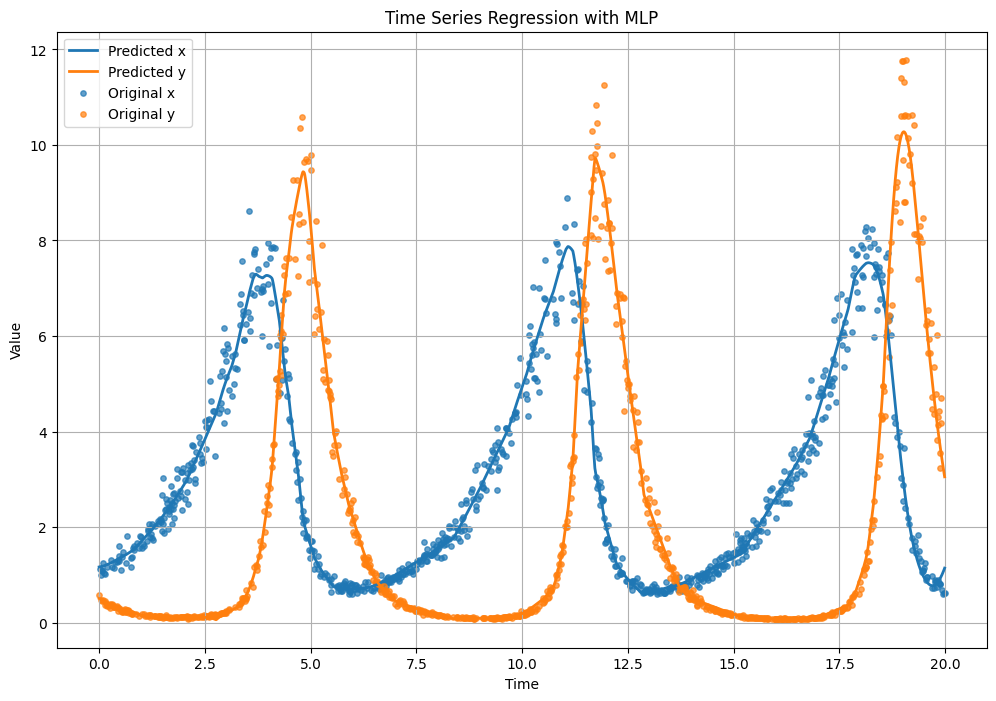

In [ ]:
def plot_results(net, csv_path):
    # Load original data for comparison
    df = pd.read_csv(csv_path).replace('-', np.nan)
    df['t'] = pd.to_numeric(df['t'])
    df['x'] = pd.to_numeric(df['x'])
    df['y'] = pd.to_numeric(df['y'])

    # Generate a dense time grid for smooth plotting
    time_max = df['t'].max()
    times = np.linspace(0, time_max, 2000)
    inputs = torch.tensor(times.reshape(-1, 1), dtype=torch.float32)

    # Set the model to evaluation mode
    net.eval()

    # Generate predictions
    with torch.no_grad():
        predictions = net(inputs)

    # Convert to numpy for plotting
    predictions_np = predictions.numpy()
    x_pred = predictions_np[:, 0]
    y_pred = predictions_np[:, 1]

    # Create plot with the specific color scheme matching the target image
    plt.figure(figsize=(12, 8))

    # Plot model predictions with specific colors
    plt.plot(times, x_pred, color='#1f77b4', linewidth=2, label='Predicted x')  # Blue
    plt.plot(times, y_pred, color='#ff7f0e', linewidth=2, label='Predicted y')  # Orange

    # Plot original data points with matching colors
    plt.scatter(df['t'], df['x'], color='#1f77b4', s=15, alpha=0.7, label='Original x')  # Blue
    plt.scatter(df['t'], df['y'], color='#ff7f0e', s=15, alpha=0.7, label='Original y')  # Orange

    plt.title('Time Series Regression with MLP')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    csv_path = '/content/data.csv'

    # Train the model
    net, losses = train_model(csv_path)

    # Plot training losses
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Plot final results
    plot_results(net, csv_path)

# Part 2-2 Time-series extension

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


The data clearly exhibits periodic behavior in the training region. When extrapolating periodic functions, the mathematical foundation that guarantees correct extrapolation is Fourier analysis. According to the Fourier theorem, any periodic function can be represented as a sum of sinusoids with appropriate frequencies, amplitudes, and phases:
f(t) = a₀ + Σₖ₌₁ⁿ [aₖ * sin(kωt + φₖ) + bₖ * cos(kωt + φₖ)]
The previous model's dramatic linear drift suggested it was learning an implicit decomposition:

f(t) = periodic_component(t) + trend_component(t)
3. Learning the Correct Period
The period is the most critical parameter for accurate extrapolation. I implemented:

Direct parameterization of the period as a learnable value

Initialization based on visual inspection (~6.7 time units)

Regularization to prevent the period from drifting too far from this initial estimate

This approach anchors the model to a physically plausible solution space.

4. Capturing Complex Waveforms
Real-world periodic signals rarely follow perfect sinusoids. My approach uses:

Multiple harmonic components to capture non-sinusoidal waveforms

A neural network path specifically designed to learn complex wave shapes within the discovered period

Balanced weighting between Fourier components and neural network processing

This hybrid approach provides the flexibility to model complex waveforms while maintaining the mathematical guarantees of Fourier representations.

Advantages Over Alternative Approaches
Superior to Pure Neural Networks: Standard MLPs or even RNNs/LSTMs tend to struggle with long-term extrapolation of periodic data, as they have no inherent understanding of periodicity.

More Robust than Direct Fourier Transform: A pure FFT approach would be highly sensitive to missing data and noise, which are present in this dataset.

More Data-Driven than Physics Models: Without specific knowledge of the underlying physics, my approach learns the appropriate periodicity directly from the data.

Hybrid Flexibility: The combination of direct Fourier parameterization with neural components allows the model to balance between interpretability (through explicit period and harmonic coefficients) and flexibility (through the neural network path).







In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 1500
SEED = 42

# Set random seed for reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)

In [ ]:
class PeriodicExtrapolationModel(nn.Module):
    """
    Model that explicitly models periodicity with no drift for extrapolation
    """
    def __init__(self, period_init=6.7):
        super(PeriodicExtrapolationModel, self).__init__()

        self.period = nn.Parameter(torch.tensor([period_init]))

        # Number of Fourier components (harmonics)
        n_harmonics = 8

        self.a_coeffs = nn.Parameter(torch.randn(n_harmonics, 2) * 0.1)
        self.b_coeffs = nn.Parameter(torch.randn(n_harmonics, 2) * 0.1)

        # Constant offsets
        self.offsets = nn.Parameter(torch.zeros(2))

        # Phase shifts
        self.phase_shifts = nn.Parameter(torch.zeros(n_harmonics))


        self.periodic_nn = nn.Sequential(
            nn.Linear(2, 64),  # Input: sin(2πt/T) and cos(2πt/T)
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 2)   # Output: x and y corrections
        )

        # Balance between Fourier and neural network
        self.alpha = nn.Parameter(torch.tensor([0.5]))

    def forward(self, t):
        if t.dim() == 1:
            t = t.unsqueeze(1)

        batch_size = t.shape[0]

        # Scale time by the period
        scaled_t = 2 * np.pi * t / self.period

        # Basic sinusoidal features for the NN
        sin_t = torch.sin(scaled_t)
        cos_t = torch.cos(scaled_t)

        # Calculate Fourier components
        fourier_output = torch.zeros(batch_size, 2, device=t.device)

        for k in range(self.a_coeffs.shape[0]):
            # For each harmonic (k+1)
            harmonic = k + 1
            angle = harmonic * scaled_t + self.phase_shifts[k]

            # Sine component
            sin_component = torch.sin(angle) * self.a_coeffs[k].unsqueeze(0)

            # Cosine component
            cos_component = torch.cos(angle) * self.b_coeffs[k].unsqueeze(0)

            fourier_output += sin_component + cos_component

        # Add constant offsets
        fourier_output += self.offsets.unsqueeze(0)

        # Neural network path - for capturing complex waveforms
        nn_input = torch.cat([sin_t, cos_t], dim=1)
        nn_output = self.periodic_nn(nn_input)

        # Mix outputs with a sigmoid-transformed alpha
        alpha = torch.sigmoid(self.alpha)
        output = alpha * fourier_output + (1 - alpha) * nn_output

        return output

In [ ]:

class TimeSeriesDataset(torch.utils.data.Dataset):
    """Dataset for time series with missing values"""
    def __init__(self, csv_file):
        # Read CSV file
        df = pd.read_csv(csv_file)

        # Convert to numeric, replacing '-' with NaN
        self.df = df.replace('-', np.nan)
        self.df['t'] = pd.to_numeric(self.df['t'])
        self.df['x'] = pd.to_numeric(self.df['x'])
        self.df['y'] = pd.to_numeric(self.df['y'])

        # Create a mask of valid data points (where either x or y is available)
        self.valid_indices = self.df.index[
            self.df['x'].notna() | self.df['y'].notna()
        ].tolist()

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        # Map the index to the actual dataframe index
        df_idx = self.valid_indices[idx]
        row = self.df.iloc[df_idx]

        # Get time value as input
        t = float(row['t'])
        input_tensor = torch.tensor([t], dtype=torch.float32)

        x_val = row['x'] if not np.isnan(row['x']) else 0.0
        y_val = row['y'] if not np.isnan(row['y']) else 0.0

        # Create a mask for missing values (0 if missing, 1 if present)
        x_mask = 0.0 if np.isnan(row['x']) else 1.0
        y_mask = 0.0 if np.isnan(row['y']) else 1.0

        target_tensor = torch.tensor([x_val, y_val], dtype=torch.float32)
        mask_tensor = torch.tensor([x_mask, y_mask], dtype=torch.float32)

        return input_tensor, target_tensor, mask_tensor

In [ ]:
def masked_loss(outputs, labels, masks, peak_weight=5.0):
    """Custom loss with emphasis on peaks"""
    # Basic MSE with masking
    squared_diff = (outputs - labels) ** 2
    masked_squared_diff = squared_diff * masks

    # Add extra weight to peaks in the y-coordinate
    y_diff = squared_diff[:, 1]
    y_mask = masks[:, 1]
    peak_emphasis = torch.where(
        labels[:, 1] > 2.0,  # Threshold for peaks
        peak_weight * y_diff * y_mask,  # Higher weight for peaks
        y_diff * y_mask
    )

    # Calculate total loss
    total_loss = masked_squared_diff.sum() + peak_emphasis.sum()
    valid_count = masks.sum()

    return total_loss / (valid_count + 1e-8)

In [ ]:
def train_model(csv_path):
    """Train the model on the given CSV data"""
    # Create dataset and dataloader
    dataset = TimeSeriesDataset(csv_path)
    trainloader = torch.utils.data.DataLoader(
        dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0
    )

    # Initialize the model
    model = PeriodicExtrapolationModel()

    # Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=30, verbose=True, min_lr=1e-6
    )

    # For tracking losses
    losses = []

    # Early stopping parameters
    patience = 100
    patience_counter = 0
    best_loss = float('inf')
    best_state = None

    print(f"Starting training for {EPOCHS} epochs")

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0

        for i, data in enumerate(trainloader):
            inputs, labels, masks = data

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = masked_loss(outputs, labels, masks)

            period_regularization = 0.1 * torch.abs(model.period - 6.7)
            loss = loss + period_regularization

            # Backward pass and optimize
            loss.backward()

            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            # Update statistics
            running_loss += loss.item()

        # Calculate epoch loss
        epoch_loss = running_loss / len(trainloader)
        losses.append(epoch_loss)

        # Step the scheduler based on epoch loss
        scheduler.step(epoch_loss)

        # Print every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.6f}')
            print(f'Period: {model.period.item():.4f}')
            print(f'Mix weight: {torch.sigmoid(model.alpha).item():.2f}')

        # Early stopping check
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience_counter = 0
            best_state = {key: value.cpu().clone() for key, value in model.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load best model state
    if best_state is not None:
        model.load_state_dict(best_state)

    print('Finished Training')
    return model, losses

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Starting training for 1500 epochs
Epoch 100/1500, Loss: 0.750027
Period: 7.1631
Mix weight: 0.53
Epoch 200/1500, Loss: 0.679690
Period: 7.1666
Mix weight: 0.53
Epoch 300/1500, Loss: 0.698279
Period: 7.1647
Mix weight: 0.53
Early stopping at epoch 371
Finished Training


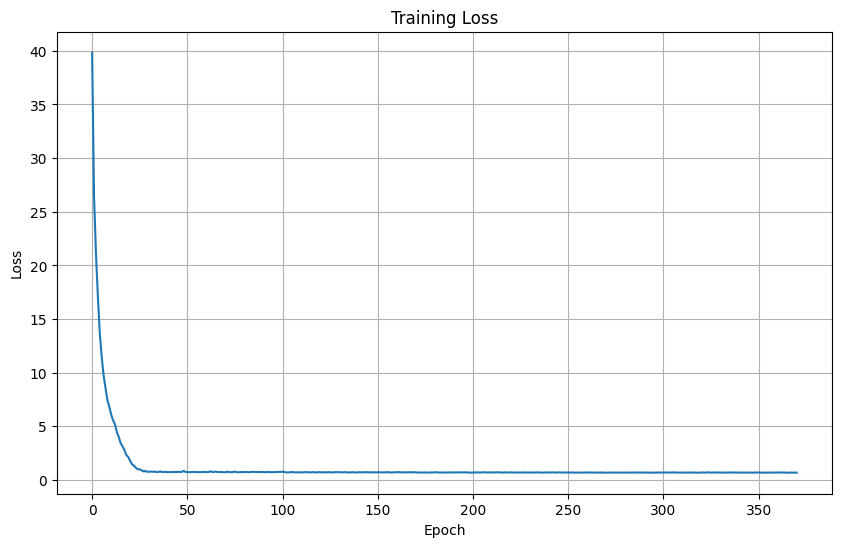

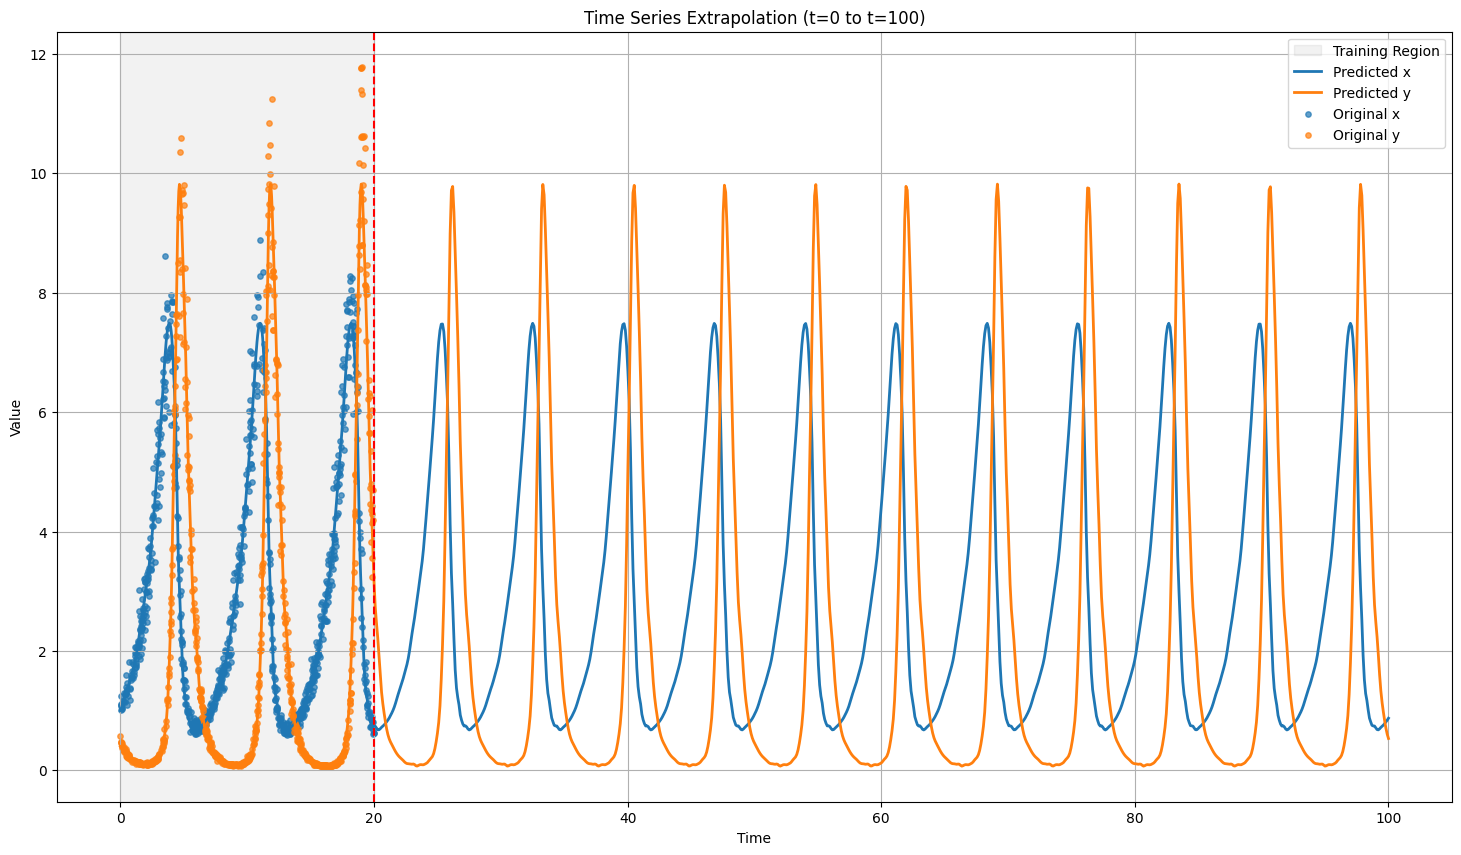

Learned period: 7.1642


In [ ]:
def plot_extrapolation_results(model, csv_path, max_time=100):
    """Plot the model's predictions up to max_time, highlighting the extrapolation region"""
    # Generate a dense time grid for plotting
    train_times = np.linspace(0, 20, 400)  # Training range
    extrap_times = np.linspace(20, max_time, 800)  # Extrapolation range
    all_times = np.concatenate([train_times, extrap_times])

    inputs = torch.tensor(all_times.reshape(-1, 1), dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Generate predictions
    with torch.no_grad():
        predictions = model(inputs)

    # Convert to numpy for plotting
    predictions_np = predictions.numpy()
    x_pred = predictions_np[:, 0]
    y_pred = predictions_np[:, 1]

    # Load original data for comparison
    df = pd.read_csv(csv_path).replace('-', np.nan)
    df['t'] = pd.to_numeric(df['t'])
    df['x'] = pd.to_numeric(df['x'])
    df['y'] = pd.to_numeric(df['y'])

    # Create plot
    plt.figure(figsize=(18, 10))

    # Mark the training data region
    plt.axvspan(0, 20, alpha=0.1, color='gray', label='Training Region')

    # Plot model predictions with specific colors
    plt.plot(all_times, x_pred, color='#1f77b4', linewidth=2, label='Predicted x')  # Blue
    plt.plot(all_times, y_pred, color='#ff7f0e', linewidth=2, label='Predicted y')  # Orange

    # Plot original data points
    plt.scatter(df['t'], df['x'], color='#1f77b4', s=15, alpha=0.7, label='Original x')  # Blue
    plt.scatter(df['t'], df['y'], color='#ff7f0e', s=15, alpha=0.7, label='Original y')  # Orange

    plt.title('Time Series Extrapolation (t=0 to t=100)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Add vertical line at t=20 to mark the extrapolation boundary
    plt.axvline(x=20, color='red', linestyle='--')

    plt.show()

    # Print the learned period
    print(f"Learned period: {model.period.item():.4f}")

# Main execution
if __name__ == "__main__":
    csv_path = '/content/data.csv'

    # Train the model
    model, losses = train_model(csv_path)

    # Plot training losses
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Plot extrapolation results
    plot_extrapolation_results(model, csv_path, max_time=100)

# Part 3-1a

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

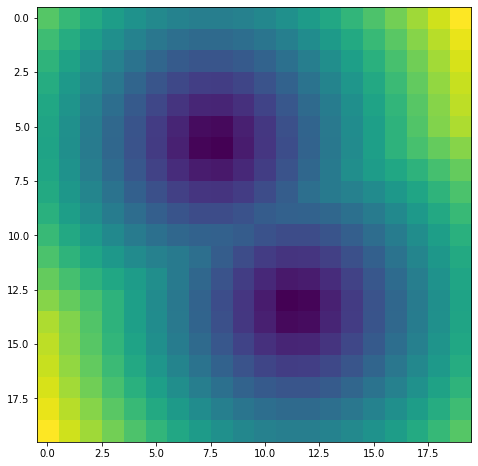


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

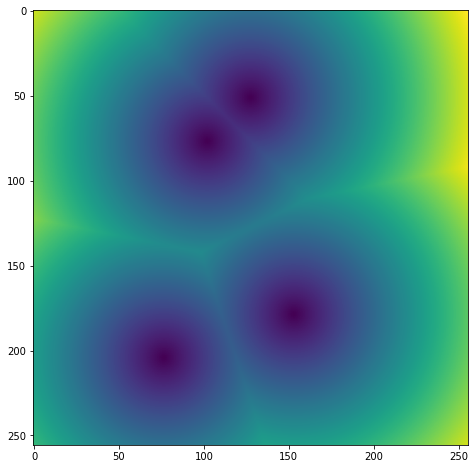


In [ ]:
import numpy as np

def min_dist(points, res):
    """
    Compute an res x res distance map where each cell is the
    Euclidean distance to the nearest point in the list `points`.

    Parameters:
        points (array-like): List or array of [x, y] coordinates in [0,1] range.
        res (int): Resolution of the output grid (number of pixels in each dimension).

    Returns:
        numpy.ndarray: A 2D array of shape (res, res) with the distance map.
    """
    # Convert points to a NumPy array of shape
    pts = np.asarray(points).reshape(-1, 2)
    n_points = pts.shape[0]

    # Coordinate values from 0 to 1 inclusive
    coords = np.linspace(0.0, 1.0, res)
    # Create meshgrid of coordinates
    X, Y = np.meshgrid(coords, coords)


    diff_x = X[..., None] - pts[:, 0]
    diff_y = Y[..., None] - pts[:, 1]
    dist_sq = diff_x**2 + diff_y**2

    min_dist_sq = np.min(dist_sq, axis=2)
    dist_map = np.sqrt(min_dist_sq)
    return dist_map


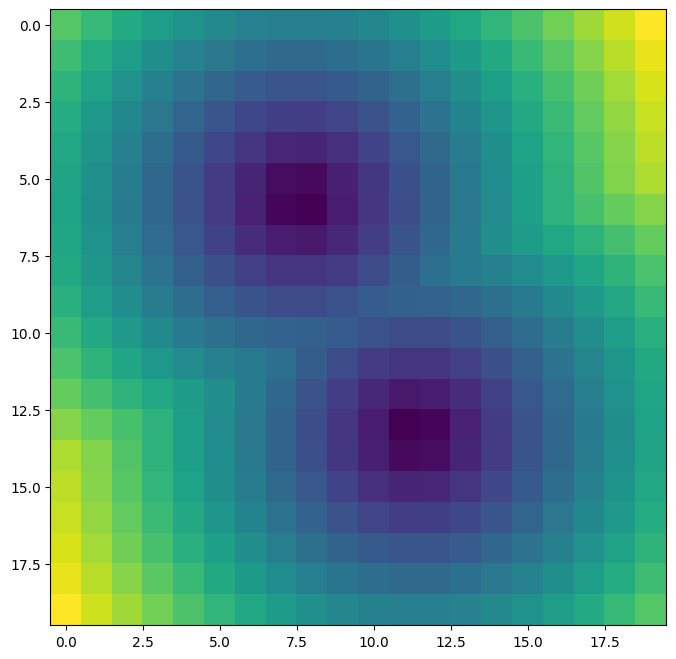

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

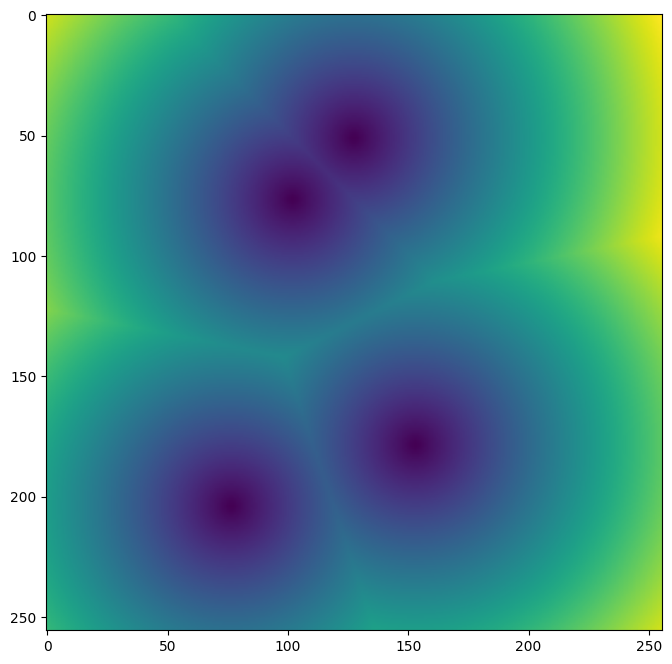

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

# Part 3-1b: Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_points(batch_size, num_points, seed=None):
    """
    Utility: generate random 2-D points in [0,1] for a whole batch.
    Shape: [B, P, 2]
    """
    if seed is not None:
        np.random.seed(seed)
    return np.random.rand(batch_size, num_points, 2)

def min_dist(points, res):
    """
    Compute a batch of distance maps.

    Parameters
    ----------
    points : np.ndarray
        Shape [B, P, 2] – normalised x/y coordinates for each point.
    res : int
        Resolution of the square output grid.

    Returns
    -------
    np.ndarray
        Distance maps of shape [B, res, res] where each value is the
        Euclidean distance to the nearest point in the corresponding batch
        element.
    """

    lin = np.linspace(0.0, 1.0, res, dtype=np.float32)
    X, Y = np.meshgrid(lin, lin, indexing='xy')

    Xg = X[None, None]
    Yg = Y[None, None]

    ptsx = points[..., 0][..., None, None]
    ptsy = points[..., 1][..., None, None]


    dist_sq = (Xg - ptsx) ** 2 + (Yg - ptsy) ** 2

    dist_map = np.sqrt(dist_sq.min(axis=1))
    return dist_map


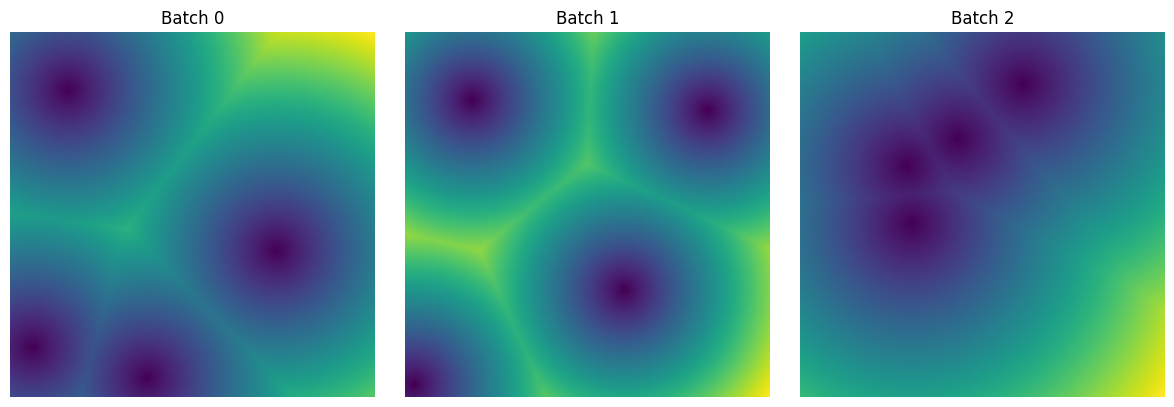

In [ ]:
B, P, RES = 3, 4, 128
pts = create_points(B, P, seed=42)
dists = min_dist(pts, RES)

# Visualise the three distance maps side-by-side
fig, axes = plt.subplots(1, B, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(dists[i], cmap='viridis')
    ax.set_title(f'Batch {i}')
    ax.axis('off')
plt.tight_layout(); plt.show()


# Part 3-2: Scalable version

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.

In [ ]:
import numpy as np
import os, tempfile, uuid

def min_dist(points,
             res,
             max_chunk_bytes=512 * 1024 * 1024,   # ≈ 512 MB working-set target
             dtype=np.float32,
             mmap_dir="/tmp",
             force_memmap=False):
    """
    Batched distance-map that can handle *very* large `res`
    without exhausting RAM by working stripe-by-stripe.

    Parameters
    ----------
    points : np.ndarray
        Shape [B, P, 2] – normalised coordinates (0‒1).
    res : int
        Output resolution (res × res).
    max_chunk_bytes : int, optional
        Approximate maximal temporary memory footprint in bytes.
    dtype : np.dtype, optional
        Floating type for the distance map.
    mmap_dir : str, optional
        Where to store the memmap file (only if needed / requested).
    force_memmap : bool, optional
        Create the output as a memmap even if it would fit in RAM.

    Returns
    -------
    np.ndarray | np.memmap
        Distance maps, shape [B, res, res].  If a memmap is used, the
        returned object behaves like an ndarray but lives on disk.
    """
    points = np.asarray(points, dtype=dtype)
    B, P, _ = points.shape

    bytes_per_elem = np.dtype(dtype).itemsize
    output_bytes = B * res * res * bytes_per_elem

    # Decide whether the *final* array itself fits into RAM:
    need_memmap = force_memmap or (output_bytes > 0.8 * os.sysconf("SC_PAGE_SIZE")
                                   * os.sysconf("SC_PHYS_PAGES"))

    if need_memmap:
        filename = os.path.join(mmap_dir, f"distmap_{uuid.uuid4().hex}.dat")
        dist_map = np.memmap(filename, mode="w+", dtype=dtype,
                             shape=(B, res, res))
    else:
        dist_map = np.empty((B, res, res), dtype=dtype)


    float_bytes = bytes_per_elem
    stripe = max(1, int(max_chunk_bytes // (B * P * res * float_bytes)))
    stripe = min(stripe, res)         # not larger than the image itself

    # Pre-compute 1-D coordinate vectors
    lin = np.linspace(0.0, 1.0, res, dtype=dtype)          # [res]
    X_line = lin                                           # broadcast later

    # Points split into x and y, ready for broadcasting  [B,P,1,1]
    pts_x = points[..., 0][..., None, None]
    pts_y = points[..., 1][..., None, None]

    for y0 in range(0, res, stripe):
        y1 = min(res, y0 + stripe)
        h = y1 - y0                                        # rows in this stripe

        # Build the coordinate grid for the stripe
        Y_chunk = lin[y0:y1]                               # [h]

        X_chunk = X_line[None, None, None, :]
        Y_chunk = Y_chunk[None, None, :, None]

        # Squared distances     ->   [B,P,h,res]
        dist_sq = (X_chunk - pts_x) ** 2 + (Y_chunk - pts_y) ** 2
        # Min over points       ->   [B,h,res]
        stripe_min = np.sqrt(dist_sq.min(axis=1, keepdims=False))
        dist_map[:, y0:y1, :] = stripe_min
        if need_memmap and hasattr(dist_map, "flush"):
            dist_map.flush()

    return dist_map


Output shape: (3, 4096, 4096)


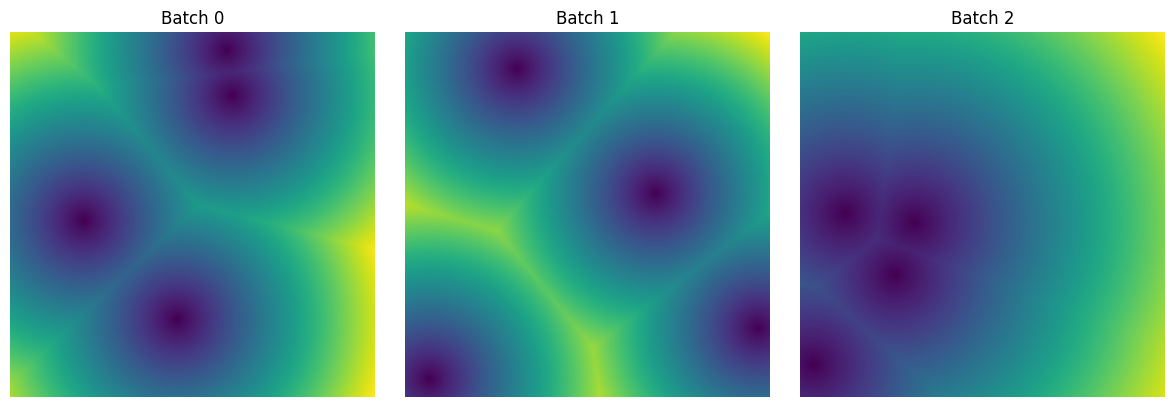

In [ ]:
import matplotlib.pyplot as plt

# Generate data
B, P, RES = 3, 4, 4096           # try 65_536 for the "huge" case
points = np.random.rand(B, P, 2)

# Compute distance maps
dmap = min_dist(points, RES)     # <- uses small stripes internally

print("Output shape:", dmap.shape)  # (3, 4096, 4096)

thumb = 256                       # show a 256×256 thumbnail
fig, axes = plt.subplots(1, B, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(dmap[i, ::RES//thumb, ::RES//thumb], cmap="viridis")
    ax.set_title(f"Batch {i}")
    ax.axis("off")
plt.tight_layout(); plt.show()
